In [1]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
#Load the data
fraudC = pd.read_csv(r"Fraud_check (1).csv")
fraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraudC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraudC.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [5]:
fraudC.duplicated().value_counts()

False    600
dtype: int64

In [6]:
fraudC["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [7]:
fraudC["Urban"].unique()

array(['YES', 'NO'], dtype=object)

In [8]:
fraudC["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [9]:
list(fraudC.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [10]:
fraudC.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [11]:
y1=np.empty(600, dtype=object)
i=0

for value in fraudC['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1 

In [12]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [13]:
f_t=pd.DataFrame(y1,columns=["Target"])
f_t

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [14]:
fraudC=pd.concat([fraudC,f_t],axis=1)
fraudC

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [15]:
fraudC.drop('Taxable.Income',inplace=True,axis=1)

In [16]:
fraudC.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [17]:
fraudC['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [18]:
fraudC['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [19]:
fraudC['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [20]:
fraudC.groupby(['Urban', 'Target', 'Undergrad', 'Marital.Status']).count()

City.Population  Work.Experience
Urban Target Undergrad Marital.Status                                  
NO    Good   NO        Divorced                     43               43
                       Married                      37               37
                       Single                       34               34
             YES       Divorced                     41               41
                       Married                      37               37
                       Single                       45               45
      Risky  NO        Divorced                     10               10
                       Married                       7                7
                       Single                       12               12
             YES       Divorced                      9                9
                       Married                      13               13
                       Single                       10               10
YES   Good   NO        Divorced                     37               37
                       Married                      35               35
                       Single                       44               44
             YES       Divorced                     32               32
                       Married                      40               40
                       Single                       51               51
      Risky  NO        Divorced                      7                7
                       Married                      12               12
                       Single                       10               10
             YES       Divorced                     10               10
                       Married                      13               13
                       Single                       11               11

In [21]:
fraudC['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [22]:
en = LabelEncoder()
fraudC['Undergrad']= en.fit_transform(fraudC['Undergrad'])
fraudC['Marital.Status']= en.fit_transform(fraudC['Marital.Status'])
fraudC['Urban']= en.fit_transform(fraudC['Urban'])
fraudC['Target']= en.fit_transform(fraudC['Target'])

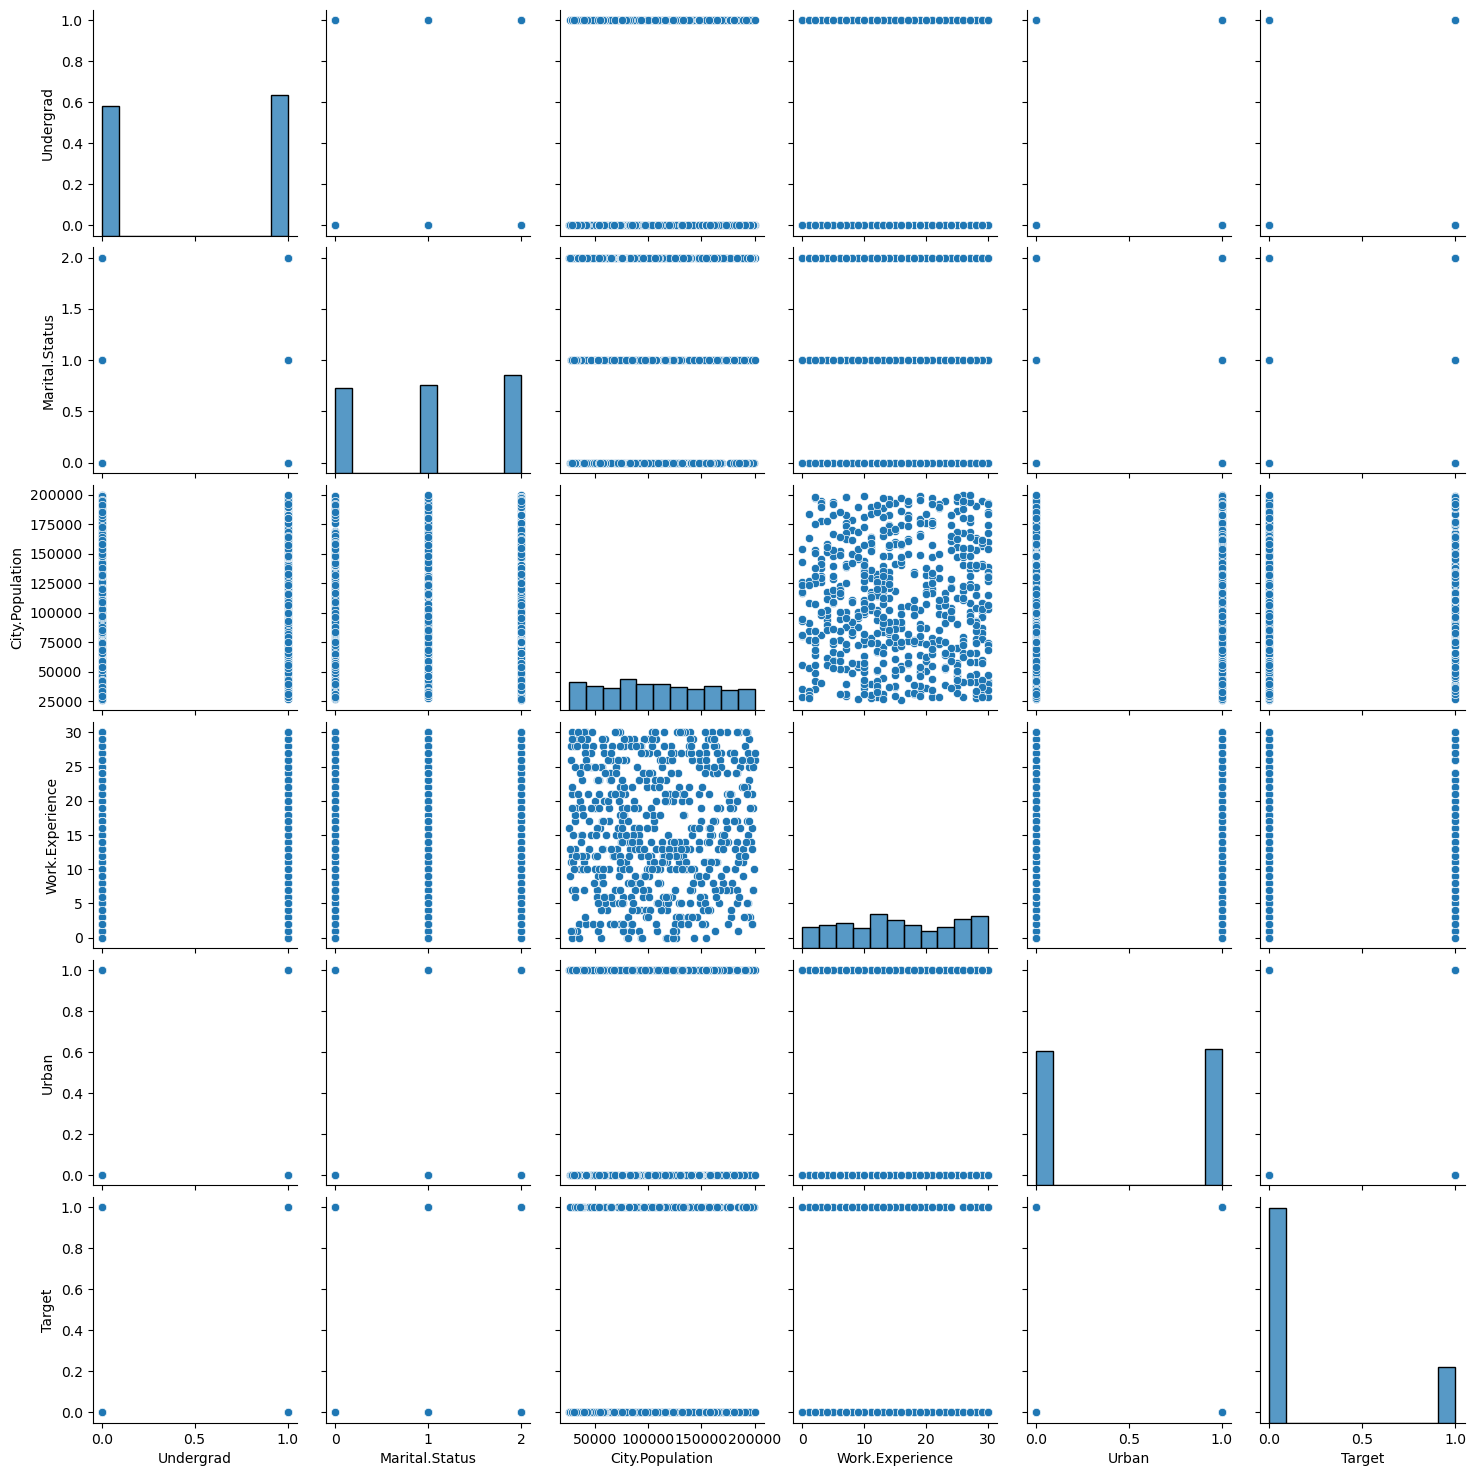

In [23]:
# Visualization
sns.pairplot(fraudC)

<Axes: >

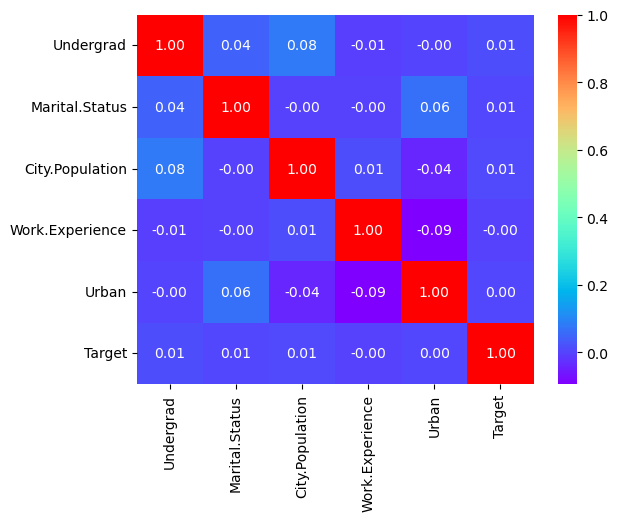

In [24]:
sns.heatmap(fraudC.corr(), cmap='rainbow', annot=True, fmt=".2f")

<Axes: xlabel='City.Population', ylabel='Density'>

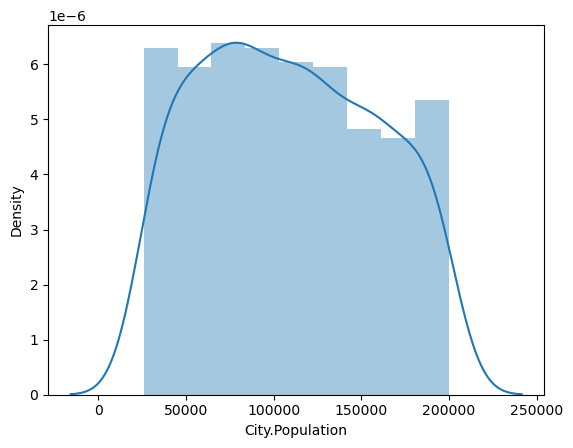

In [25]:
sns.distplot(fraudC['City.Population'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

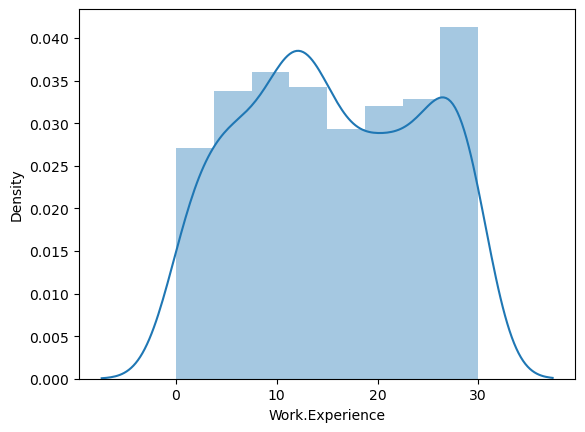

In [26]:
sns.distplot(fraudC['Work.Experience'])

<Axes: xlabel='City.Population', ylabel='Work.Experience'>

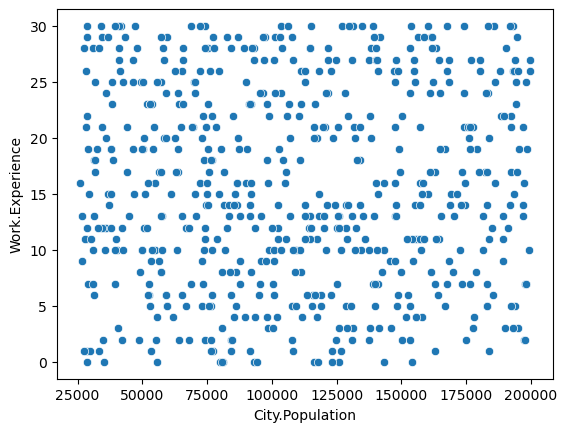

In [27]:
sns.scatterplot(x = 'City.Population', y = 'Work.Experience', data = fraudC)

In [28]:
# Define X and Y

In [29]:
x=fraudC.iloc[:,0:5]
y=fraudC['Target']
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=1)

In [31]:
#Individual Models

lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [32]:
print(lg.score(xtrain,ytrain))
print(lg.score(xtest,ytest))

0.7933333333333333
0.7933333333333333


In [33]:
#prediction function

In [34]:
def predict(model):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [35]:
predict(LogisticRegression())

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

0.7933333333333333
0.7933333333333333


In [36]:
#Decision Tree, Random forest 

In [37]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       119
           1       0.24      0.26      0.25        31

    accuracy                           0.67       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.68      0.67      0.68       150

1.0
0.6733333333333333


### BaggingClassifier

In [38]:
predict(BaggingClassifier(DecisionTreeClassifier()))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       119
           1       0.08      0.03      0.05        31

    accuracy                           0.72       150
   macro avg       0.43      0.47      0.44       150
weighted avg       0.64      0.72      0.67       150

0.9644444444444444
0.72


In [39]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       119
           1       0.00      0.00      0.00        31

    accuracy                           0.77       150
   macro avg       0.39      0.48      0.43       150
weighted avg       0.62      0.77      0.69       150

1.0
0.7666666666666667


In [40]:
from sklearn.metrics import roc_curve,auc
FPR,TPR,thresholds =roc_curve(ytest,ypred)
roc_auc=auc(FPR,TPR)
roc_auc

0.5

In [41]:
## Hyperparameter Tunning
parameter={
 'criterion':['entropy','gini'],
    'n_estimators':[1,2,4,8,16,25,26,27,28,29,30,31,32],
    'max_depth':[1,2,3,4,5,6,7],
    
}


In [42]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameter)

In [43]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [1, 2, 4, 8, 16, 25, 26, 27, 28, 29,
                                          30, 31, 32]})

In [44]:
ypred=grid.predict(xtest)

In [45]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 1, 'n_estimators': 1}

In [46]:
# Build the model
model=RandomForestClassifier(criterion='entropy',n_estimators=1,random_state=2,max_depth=1)

In [47]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [48]:
print("Training Accuracy:", model.score(xtrain,ytrain))
print("Testing Accuracy:" ,model.score(xtest,ytest))

Training Accuracy: 0.7933333333333333
Testing Accuracy: 0.7933333333333333


In [49]:
predict(BaggingClassifier(RandomForestClassifier(n_estimators=4,max_depth=1,random_state=2)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

0.7933333333333333
0.7933333333333333


### Boosting Classifier

In [50]:
predict(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       119
           1       0.00      0.00      0.00        31

    accuracy                           0.76       150
   macro avg       0.39      0.48      0.43       150
weighted avg       0.62      0.76      0.69       150

0.8044444444444444
0.76


In [51]:
predict(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       119
           1       0.10      0.03      0.05        31

    accuracy                           0.74       150
   macro avg       0.44      0.48      0.45       150
weighted avg       0.64      0.74      0.68       150

0.8777777777777778
0.74


In [52]:
#K-fold CV

In [53]:
kf = KFold(n_splits=10)

score = cross_val_score(GradientBoostingClassifier(),x,y, cv = kf)

In [54]:
score


array([0.76666667, 0.68333333, 0.66666667, 0.73333333, 0.8       ,
       0.68333333, 0.78333333, 0.76666667, 0.8       , 0.81666667])

In [55]:
score.mean()

0.7499999999999999

### XGBClassifier

In [56]:
!pip install xgboost

In [57]:
from xgboost import XGBClassifier

In [58]:
fraudC

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Target
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [59]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Target, Length: 600, dtype: int32

In [60]:
predict(XGBClassifier())

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       119
           1       0.18      0.13      0.15        31

    accuracy                           0.70       150
   macro avg       0.49      0.49      0.48       150
weighted avg       0.66      0.70      0.68       150

1.0
0.7


## Ensemble Technique

### Voting and Stacking Classifier

In [61]:
#Models list

In [62]:
models = []

models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn', KNeighborsClassifier()))

In [63]:
models

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy')),
 ('knn', KNeighborsClassifier())]

In [64]:
# Voting Classifier
vt = VotingClassifier(estimators=models)

vt.fit(xtrain,ytrain)

ypred = vt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       119
           1       0.50      0.03      0.06        31

    accuracy                           0.79       150
   macro avg       0.65      0.51      0.47       150
weighted avg       0.74      0.79      0.71       150



In [65]:
from sklearn.ensemble import StackingClassifier

In [66]:
# Stacking Classifier
predict(StackingClassifier(estimators=models, final_estimator = RandomForestClassifier(max_depth=3)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150

0.7933333333333333
0.7933333333333333


In [67]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [68]:
f_list=list(x.columns)
f_importance=pd.Series(model.feature_importances_ , index=f_list).sort_values(ascending=False)

In [69]:
print(f_importance)

City.Population    1.0
Undergrad          0.0
Marital.Status     0.0
Work.Experience    0.0
Urban              0.0
dtype: float64
